# Analysis 2

#### Stats for each team per gmae to opposition (Goals scored, Shots, Yellow cards and Red cards) 
#### goals, yellow cards, shots, team_name
#### Find out above stats for a team in consideration (home and away) and same for opposition team (away and home)
#### Plot 4 box plots each with one of the above stats for all teams
#### This analysis gives insight of the team performance

In [1]:
#Import statements
import json, os, glob, matplotlib as mpl, matplotlib.pyplot as plt, seaborn as sns, pandas as pd, numpy as np, itertools
import matplotlib.patches as mpatches
from datetime import datetime
from pandas import DataFrame

In [58]:
current_dir = os.path.dirname('__file__')
matches_dir = os.path.join(current_dir, '..', 'data','eventsseason','*.json')

In [120]:
team_name = []
team_score = []
team_shots = []
team_yellow_cards = []
team_red_cards = []

# Get the list of all events/matches and store in a variable
for filename in glob.glob(matches_dir):
    with open(filename) as team_file:
        file = json.load(team_file)
        
        team_name = [event['strHomeTeam'] for event in file['events'] if datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.today() ]
        team_name.extend([event['strAwayTeam'] for event in file['events'] if datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.today()])
        
        team_score = [int(event['intHomeScore']) for event in file['events'] if datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.today()]
        team_score.extend([int(event['intAwayScore']) for event in file['events'] if datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.today()])
        
        team_shots = [int(event['intHomeShots']) for event in file['events'] if datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.today()]
        team_shots.extend([int(event['intAwayShots']) for event in file['events'] if datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.today()])
        
        team_yellow_cards = [len(event['strHomeYellowCards'].split(';'))-1 for event in file['events'] if datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.today()]
        team_yellow_cards.extend([len(event['strAwayYellowCards'].split(';'))-1 for event in file['events'] if datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.today()])
        
        team_red_cards = [len(event['strHomeRedCards'].split(';'))-1 for event in file['events'] if datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.today()]
        team_red_cards.extend([len(event['strAwayRedCards'].split(';'))-1 for event in file['events'] if datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.today()])

In [121]:
team_df = DataFrame({'team' :team_name, 'score': team_score, 'shots': team_shots, 'yellow_cards': team_yellow_cards, 'red_cards': team_red_cards})
team_df.head()

,red_cards,score,shots,team,yellow_cards
0,0,2,5,Hull,2
1,0,0,4,Crystal Palace,2
2,0,1,6,Everton,0
3,0,1,2,Middlesbrough,3
4,0,0,3,Burnley,3


In [134]:
#Function to create output data folder
def create_directory_for_output():
    current_dir = os.path.dirname('__file__')
    data_folder = os.path.join(current_dir, 'ana_2')
    if not os.path.exists(data_folder):
        os.mkdir(data_folder)
    return data_folder

output_folder=create_directory_for_output()

In [135]:
#csv file name and path
file_name = 'team_stats'
file_path = os.path.join(output_folder, file_name)
file_path+='.csv'

#Save file to created output file
team_df.to_csv(file_path,index = False)

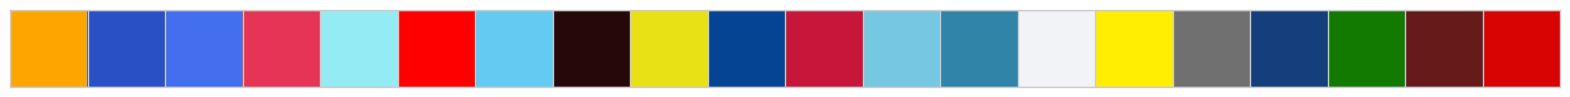

In [151]:
# Generating pallet matching the team jersey home and away
flatui = ["#FFA500", "#2950c5", "#436eee", "#e53455", "#95ebf4", "#ff0000", "#65caf2", "#260808", "#e8e114", "#054393", "#c6173a", "#76c7e2", "#3084a8", "#f2f3f7", "#ffee00", "#707070", "#153e7c", "#137a01", "#661a1a", "#d80404"]
sns.palplot(sns.color_palette(flatui))

plt.show()

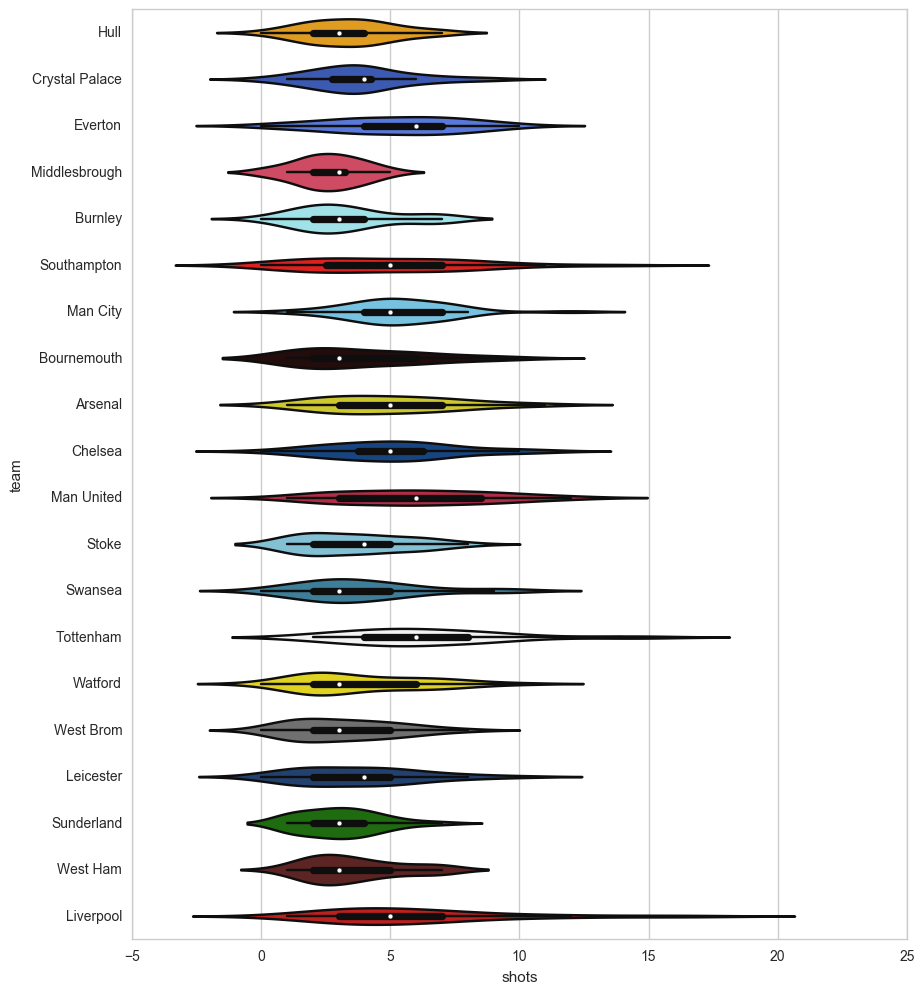

In [156]:
# Plot the violin plot for team versus number of shots taken
# Violin plot shows the kernel density estimation of the underlying distribution
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10,12))

ax = sns.violinplot(x="shots", y="team", data=team_df, palette=flatui)
plt.show()

# File name
pallet_name = 'shots_per_game'
pallet_path = os.path.join(output_folder, pallet_name)
pallet_path+='.png'

#Save the plot
ax.figure.savefig(pallet_path, bbox_inches='tight')   # save the figure to file

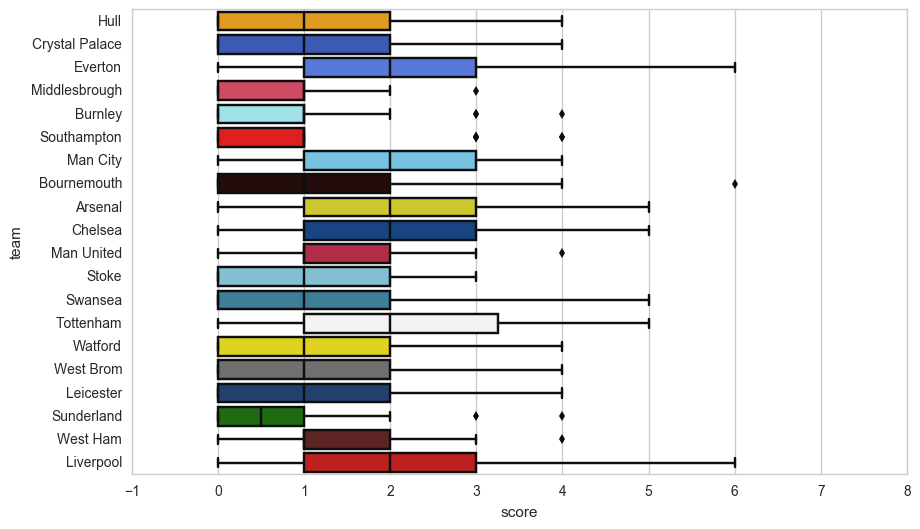

In [131]:
# Plot the box plot for team versus scores
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10,6))

ax = sns.boxplot(x="score", y="team", data=team_df, palette=flatui)

# Modifying the scale
plt.xlim(-1, 8)

plt.show()

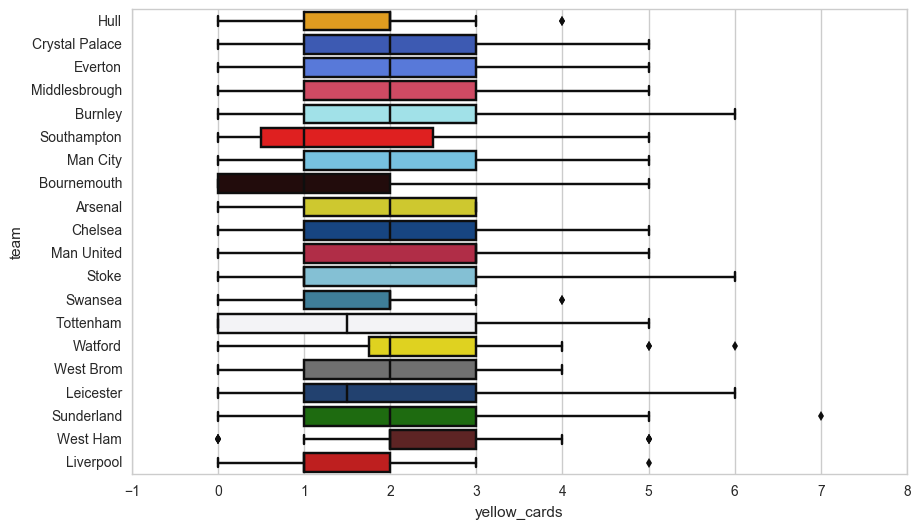

In [132]:
# Plot the box plot for team versus yellow cards
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10,6))

ax = sns.boxplot(x="yellow_cards", y="team", data=team_df, palette=flatui)

# Modifying the scale
plt.xlim(-1, 8)

plt.show()

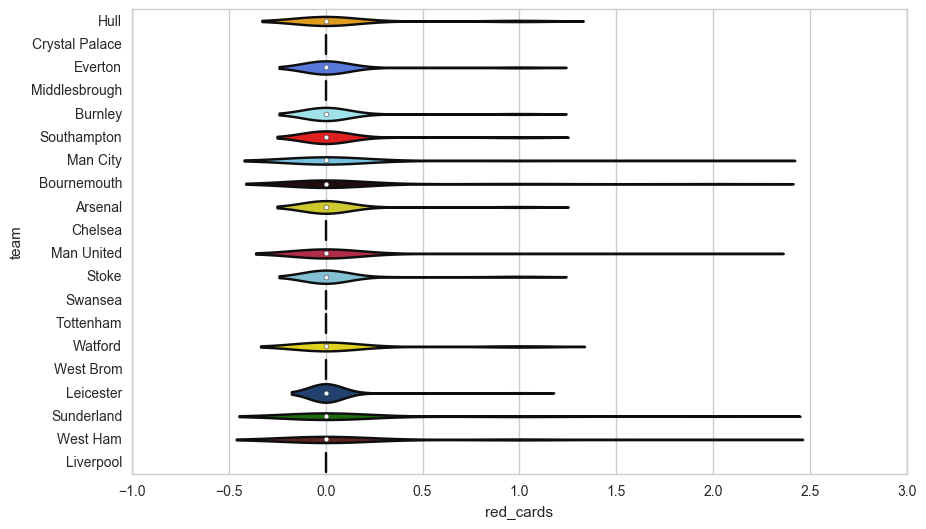

In [133]:
# Plot the box plot for team versus red cards
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10,6))

ax = sns.violinplot(x="red_cards", y="team", data=team_df, palette=flatui)

# Modifying the scale
plt.xlim(-1, 3)

plt.show()